# Code in progress

In [1]:
from pathlib import Path

import torch
from torch.utils.data import ConcatDataset

from torchvision.datasets import MNIST
from torchvision import transforms
from lightning.pytorch import utilities
from model import MNIST as MNIST_model

from cleanvision import Imagelab

c:\Dev\MNIST\.venv\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [2]:
root_path = Path('../')
model_path = root_path / 'models/model.ckpt'

model = MNIST_model.load_from_checkpoint(model_path, map_location=torch.device('cpu'))
utilities.model_summary.ModelSummary(model) # type: ignore

  | Name  | Type       | Params
-------------------------------------
0 | model | Sequential | 71.0 K
-------------------------------------
71.0 K    Trainable params
0         Non-trainable params
71.0 K    Total params
0.284     Total estimated model params size (MB)

In [3]:
train_dataset = MNIST(
    root=(root_path / "data").as_posix(),
    train=True,
    # transform=transforms.Compose([
    #     transforms.ToTensor(),
    # ])
)

test_dataset = MNIST(
    root=(root_path / "data").as_posix(),
    train=False,
    # transform=transforms.Compose([
    #     transforms.ToTensor(),
    # ])
)

dataset = ConcatDataset([train_dataset, test_dataset])
dataset

In [4]:
imagelab = Imagelab(torchvision_dataset=dataset)

In [5]:
# Automatically check for a predefined list of issues within your dataset
imagelab.find_issues()

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/70000 [00:00<?, ?it/s]

  0%|          | 0/70000 [00:00<?, ?it/s]

Issue checks completed. 144403 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


In [6]:
imagelab.issue_summary

,issue_type,num_images
0,grayscale,70000
1,low_information,70000
2,near_duplicates,4403
3,blurry,0
4,dark,0
5,light,0
6,odd_aspect_ratio,0
7,odd_size,0
8,exact_duplicates,0


In [30]:
near_duplicates = imagelab.issues[imagelab.issues["is_near_duplicates_issue"] == True].sort_values(by="near_duplicates_score")
near_duplicates.head()["near_duplicates_score"]

41748    0.016949
61836    0.016949
14228    0.016949
52342    0.016949
14221    0.016949
Name: near_duplicates_score, dtype: float64

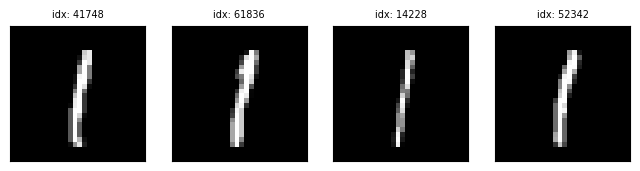

In [24]:
imagelab.visualize(indices=near_duplicates.index.to_list()[:4])

Set: 0


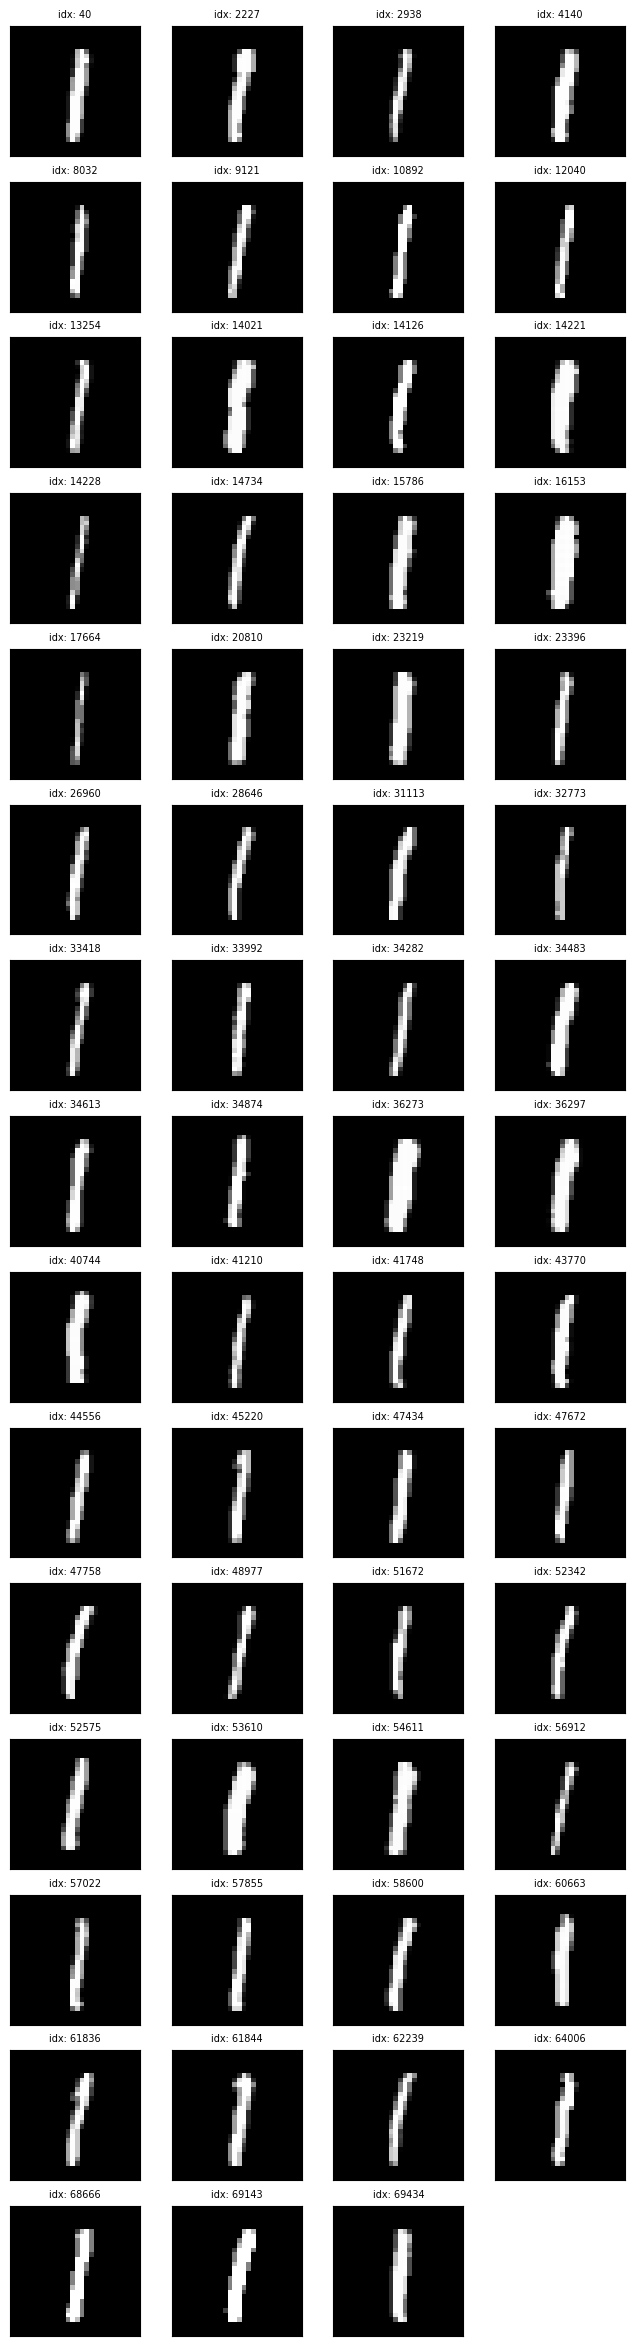

In [38]:
imagelab.visualize(issue_types=["near_duplicates"], num_images=1)